In [1]:
import tensorflow as tf

print(tf.__version__)

from tensorflow.python.client import device_lib


1.15.0


In [2]:
# Mask R-CNN
import sys
import numpy as np
import skimage
import time
import os
import cv2

ROOT_DIR = os.path.abspath("./")

sys.path.append(os.path.join(ROOT_DIR, "mrcnn"))
from mrcnn import utils, visualize
from imutils.video import WebcamVideoStream
import mrcnn.model as modellib
from mrcnn.model import mold_image

# Root directory of the project
from samples.coco.coco import CocoConfig



# To find local version# Directory to save logs and trained model
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))

MODEL_DIR = os.path.join(ROOT_DIR, "logs")# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "models", "mixed_cards.h5")

Using TensorFlow backend.


In [3]:
class InferenceConfig(CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 3

config = InferenceConfig()
config.display()# Create model object in inference mode.


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [4]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)# Define COCO Class names








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [5]:
class_names = ['BG', 'green_card', 'gold_card']

In [6]:
# Open webcam at the ID 0
cap = cv2.VideoCapture(0)#Check whether user selected camera is opened successfully.
if not (cap.isOpened()):
    print("Could not open video device")

[(0.6500000000000004, 0.0, 1.0), (1.0, 0.0, 0.28800000000000026), (0.0, 1.0, 0.48999999999999977), (0.992, 0.0, 1.0), (0.0, 0.7539999999999996, 1.0), (1.0, 0.486, 0.0), (0.6559999999999999, 1.0, 0.0), (1.0, 0.0, 0.7859999999999996), (1.0, 0.0, 0.8520000000000003), (0.8180000000000005, 0.0, 1.0), (0.0, 1.0, 0.16000000000000014), (0.8540000000000001, 1.0, 0.0), (0.0, 1.0, 0.8799999999999999), (1.0, 0.5640000000000001, 0.0), (0.0, 1.0, 0.5979999999999999), (0.0, 1.0, 0.4240000000000004), (0.0, 0.5140000000000002, 1.0), (1.0, 0.0, 0.4319999999999995), (0.0, 1.0, 0.8739999999999997), (0.0, 1.0, 0.5499999999999998), (0.0, 0.532, 1.0), (0.0, 0.1299999999999999, 1.0), (0.0, 0.7299999999999995, 1.0), (1.0, 0.0, 0.9900000000000002), (0.0, 0.28000000000000025, 1.0), (1.0, 0.3480000000000001, 0.0), (1.0, 0.0, 0.6120000000000001), (0.0, 1.0, 0.02200000000000024), (1.0, 0.0, 0.22799999999999976), (0.3019999999999996, 0.0, 1.0), (0.15199999999999925, 0.0, 1.0), (1.0, 0.0, 0.7800000000000002), (1.0, 0

C:\Users\aimove\Documents\pycharm\mrcnn\visualize.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, figsize=figsize)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



TypeError: object of type 'NoneType' has no len()

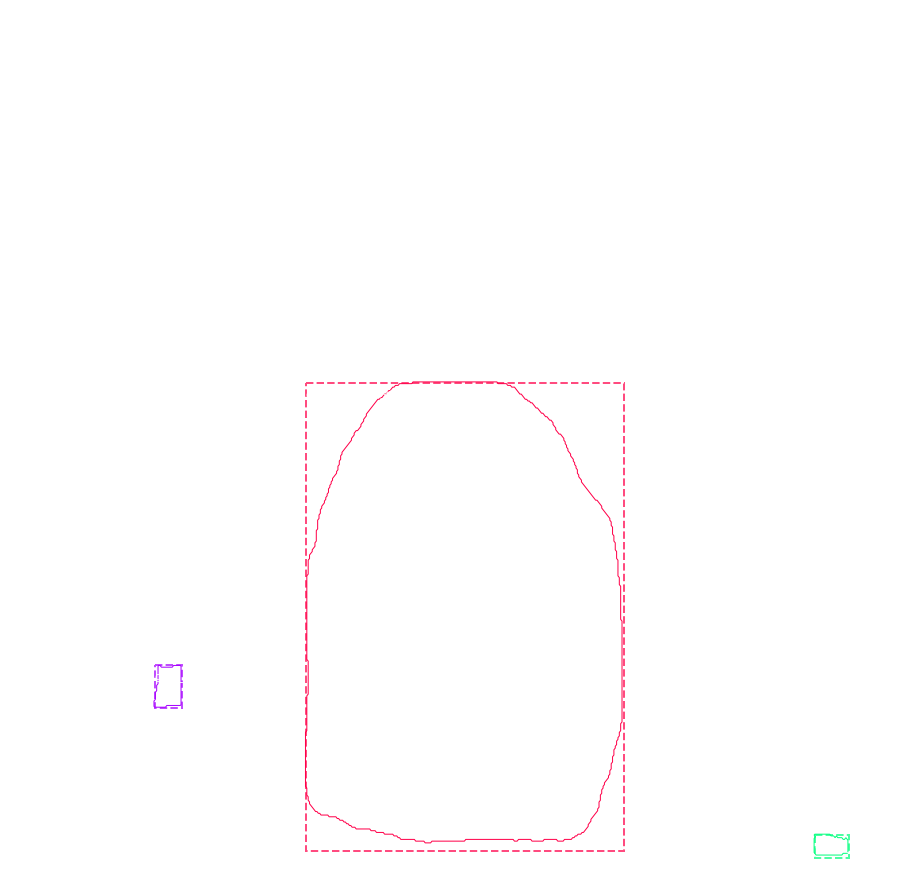

KeyboardInterrupt: 

In [6]:
# Real-Time Webcam Object Detection
colors = visualize.random_colors(1000)
print(colors)
gentle_grey = (45, 65, 79)
white = (255, 255, 255)
OPTIMIZE_CAM = False
SHOW_FPS = False
SHOW_FPS_WO_COUNTER = True # faster
PROCESS_IMG = True
fps_caption = "Undefined"

if OPTIMIZE_CAM:\
    vs = WebcamVideoStream(src=0).start()
else:
    vs = cv2.VideoCapture(0)


if SHOW_FPS:
    fps_caption = "FPS: 0"
    fps_counter = 0
    start_time = time.time()

SCREEN_NAME = "Real-Time Webcam"
cv2.namedWindow(SCREEN_NAME, cv2.WINDOW_NORMAL)
cv2.setWindowProperty(SCREEN_NAME, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
# Capture frame-by-frame
while True:
    if OPTIMIZE_CAM:
        frame = vs.read()
    else:
        grabbed, frame = vs.read()
    if not grabbed:
        break

    if SHOW_FPS_WO_COUNTER:
        start_time = time.time() # start time of the loop

    if PROCESS_IMG:
        results = model.detect([frame])
        r = results[0]# Run detection

        masked_image = visualize.display_instances(frame, r['rois'], r['masks'],
                                                     r['class_ids'], class_names,
                                                     r['scores'], colors=colors)

        # masked_image = visualize.display_instances_10fps(frame, r['rois'], r['masks'],
        #                                              r['class_ids'], class_names,
        #                                              r['scores'], colors=colors,
        #                                              real_time=True)


    if PROCESS_IMG:
        s = masked_image
    else:
        s = frame
    # print("Image shape: {1}x{0}".format(s.shape[0], s.shape[1]))
    #

    width = frame.shape[1]
    height = frame.shape[0]
    top_left_corner = (width-120, height-20)
    bott_right_corner = (width, height)
    top_left_corner_cvtext = (width-80, height-5)

    if SHOW_FPS:
        fps_counter+=1
        if (time.time() - start_time) > 5 : # every 5 second
            print('')
            # I commented that
            # fps_caption = "FPS: {:.0f}".format(fps_counter / (time.time() - start_time))
            # print(fps_caption)

    fps_counter = 0
    start_time = time.time()
    ret, baseline = cv2.getTextSize(fps_caption, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(s, (width - ret[0], height - ret[1] - baseline),
                  bott_right_corner, gentle_grey, -1)
    cv2.putText(s,fps_caption, (width - ret[0], height - baseline),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, white, lineType=cv2.LINE_AA)

    if SHOW_FPS_WO_COUNTER:
        # Display the resulting frame
        # fps_caption = "FPS: {:.0f}".format(1.0 / (time.time() - start_time))
        # print("FPS: ", 1.0 / (time.time() — start_time))
        # Put the rectangle and text on the bottom left corner
        ret, baseline = cv2.getTextSize(fps_caption, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(s, (width - ret[0], height - ret[1] - baseline),
                      bott_right_corner, gentle_grey, -1)
        cv2.putText(s, fps_caption, (width - ret[0], height - baseline),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, white, 1, lineType=cv2.LINE_AA)#Display the frame

    # s = cv2.resize(s,(1920,1080))
    s = cv2.resize(s,(1920,1080))
    cv2.imshow(SCREEN_NAME, s)
    cv2.waitKey(1)
    # if cv2.waitKey(1) & 0xFF == ord(‘q’):
    # break

# When everything is done, release the camera from video capture
if OPTIMIZE_CAM:
    vs.stop()
else:
    vs.release()
cv2.destroyAllWindows()